In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")


Setup Complete


In [2]:
jan2020 = pd.read_csv("./datasets/State of California- Vehicle Fuel Type Count by ZIP Code JANUARY 2020.csv")

C:\Users\akhi\AppData\Local\Temp\ipykernel_6148\3356154423.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  jan2020 = pd.read_csv("./datasets/State of California- Vehicle Fuel Type Count by ZIP Code JANUARY 2020.csv")


In [3]:
jan2021 = pd.read_csv("./datasets/State of California- Vehicle Fuel Type Count by ZIP Code JANUARY 2021.csv")

jan2022 = pd.read_csv("./datasets/State of California- Vehicle Fuel Type Count by ZIP Code JANUARY 2022.csv")

jan2018 = pd.read_csv("./datasets/State of California- Vehicle Fuel Type Count by ZIP Code OCTOBER 2018.csv")

C:\Users\akhi\AppData\Local\Temp\ipykernel_6148\3301791067.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  jan2021 = pd.read_csv("./datasets/State of California- Vehicle Fuel Type Count by ZIP Code JANUARY 2021.csv")
C:\Users\akhi\AppData\Local\Temp\ipykernel_6148\3301791067.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  jan2022 = pd.read_csv("./datasets/State of California- Vehicle Fuel Type Count by ZIP Code JANUARY 2022.csv")
C:\Users\akhi\AppData\Local\Temp\ipykernel_6148\3301791067.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  jan2018 = pd.read_csv("./datasets/State of California- Vehicle Fuel Type Count by ZIP Code OCTOBER 2018.csv")


<h1> First lets look at the Gasoline and Electric Market </h1>
<p> 
    Note: We are not looking at what company the cars are from yet.
    As you can see from the data, the graph with both gasoline cars and battery electric cars might make it look like there is a grim future for electric cars, but you are wrong. When we zoom in and see how electric cars are doing, we can see that the electric car market seems to have almost gone up by a factor of 7, while the gas market only seemed to go up by a factor of 2.

This is one reason we should switch to electric.
</p>

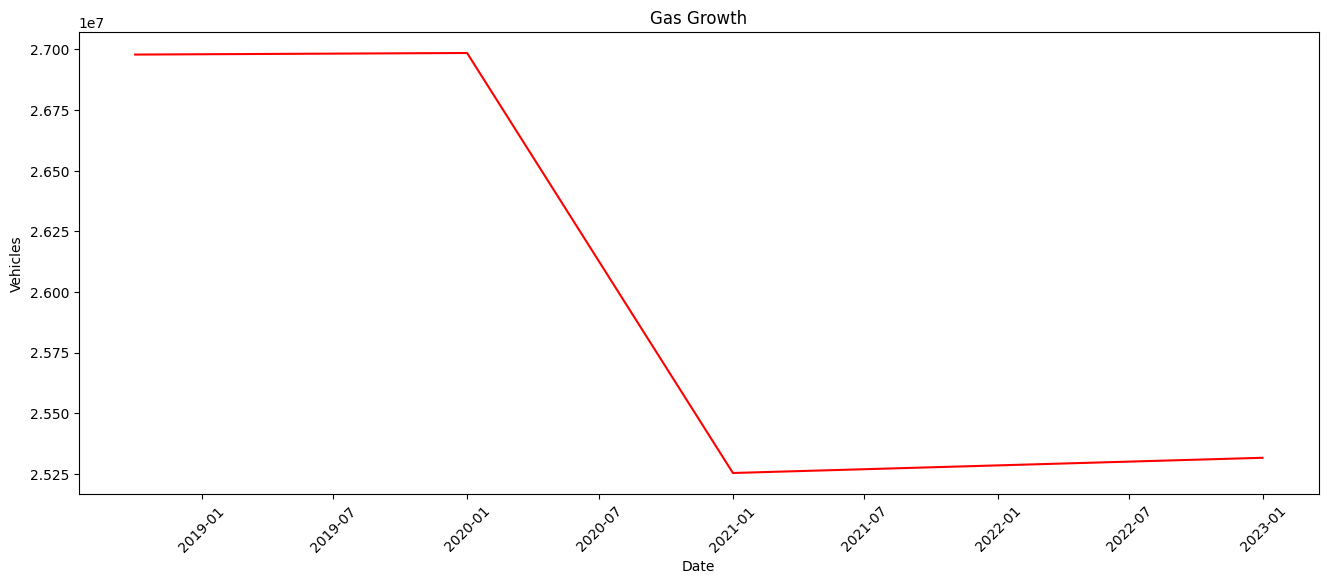

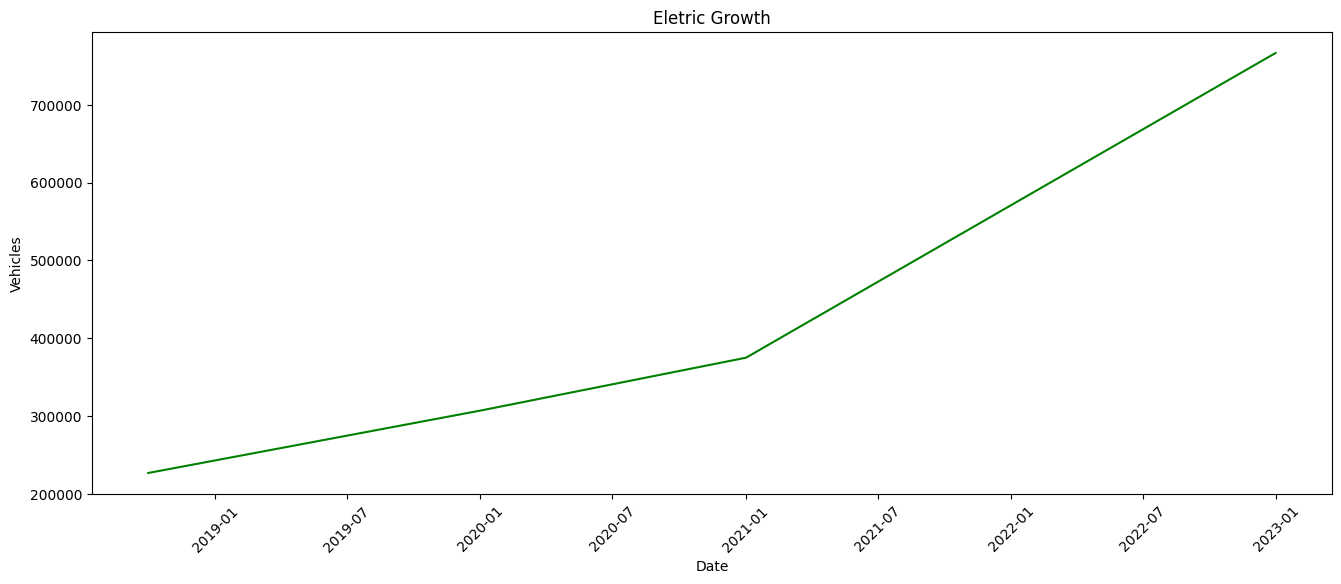

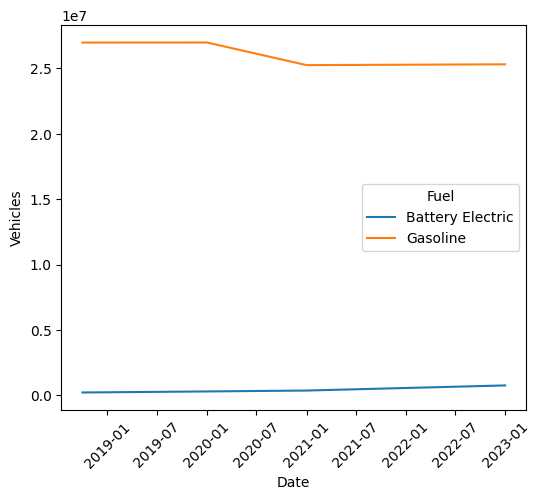

In [4]:


def change_index(series):
    series.index = pd.to_datetime(series.index)
    series = series.sort_index()
    return series

total = pd.concat([jan2018, jan2020, jan2021, jan2022])

total = total.groupby(by = ["Fuel", "Date"]).Vehicles.sum()
bat_ele = total["Battery Electric"]
gas = total["Gasoline"]
hyb = total["Hybrid Gasoline"]

bat_ele = change_index(bat_ele)
gas = change_index(gas)
hyb = change_index(hyb)

fig = plt.figure(figsize=(16,6))
plt.xticks(rotation=45)
plt.title("Gas Growth")
sns.lineplot(data=gas, color='red')
plt.savefig("Gas Growth.png")
plt.figure(figsize=(16,6))
plt.xticks(rotation=45)
plt.title("Eletric Growth")
sns.lineplot(data=bat_ele, color='green')
plt.savefig("Battery Electric Growth.png")
# Fuel, Date, Vehicle Sum
example = total.reset_index()
example.Date = pd.to_datetime(example.Date)
example = example.set_index("Date").sort_index()
example = example.loc[example.Fuel.isin(["Gasoline", "Battery Electric"])]


plt.figure(figsize=(6,5))
plt.xticks(rotation=45)
sns.lineplot(x = example.index, y = example.Vehicles, hue = example.Fuel)
plt.savefig("Gas vs Battery Electric.png")


<b> Here are bar chart versions of the info above </b>

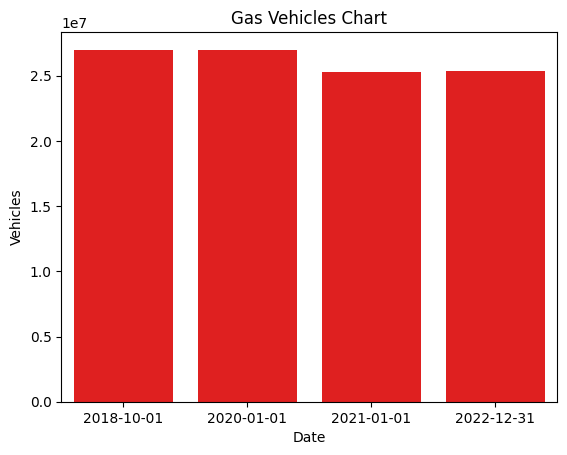

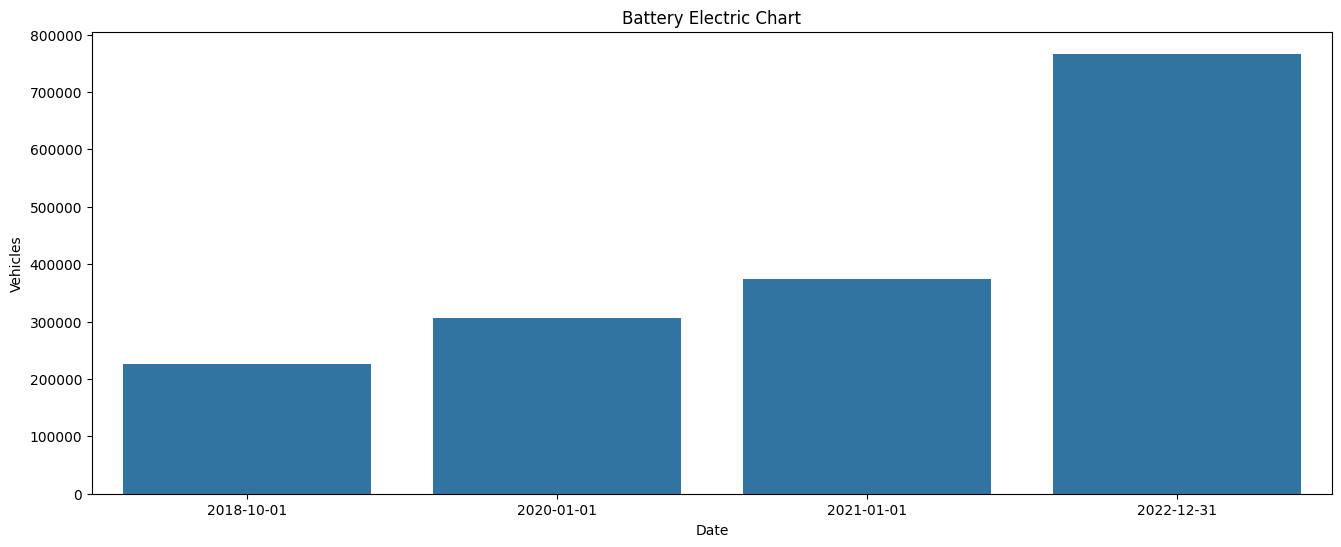

In [5]:
plt.title("Gas Vehicles Chart")
sns.barplot(data = gas, color="red")
plt.savefig("Gas G Bar.png")
plt.figure(figsize = (16,6))
plt.title("Battery Electric Chart")
sns.barplot(data = bat_ele)
plt.savefig("Bat Ele Bar.png")

<Axes: title={'center': 'Growth of each Fuel Type over the years'}, xlabel='Date', ylabel='Vehicles'>

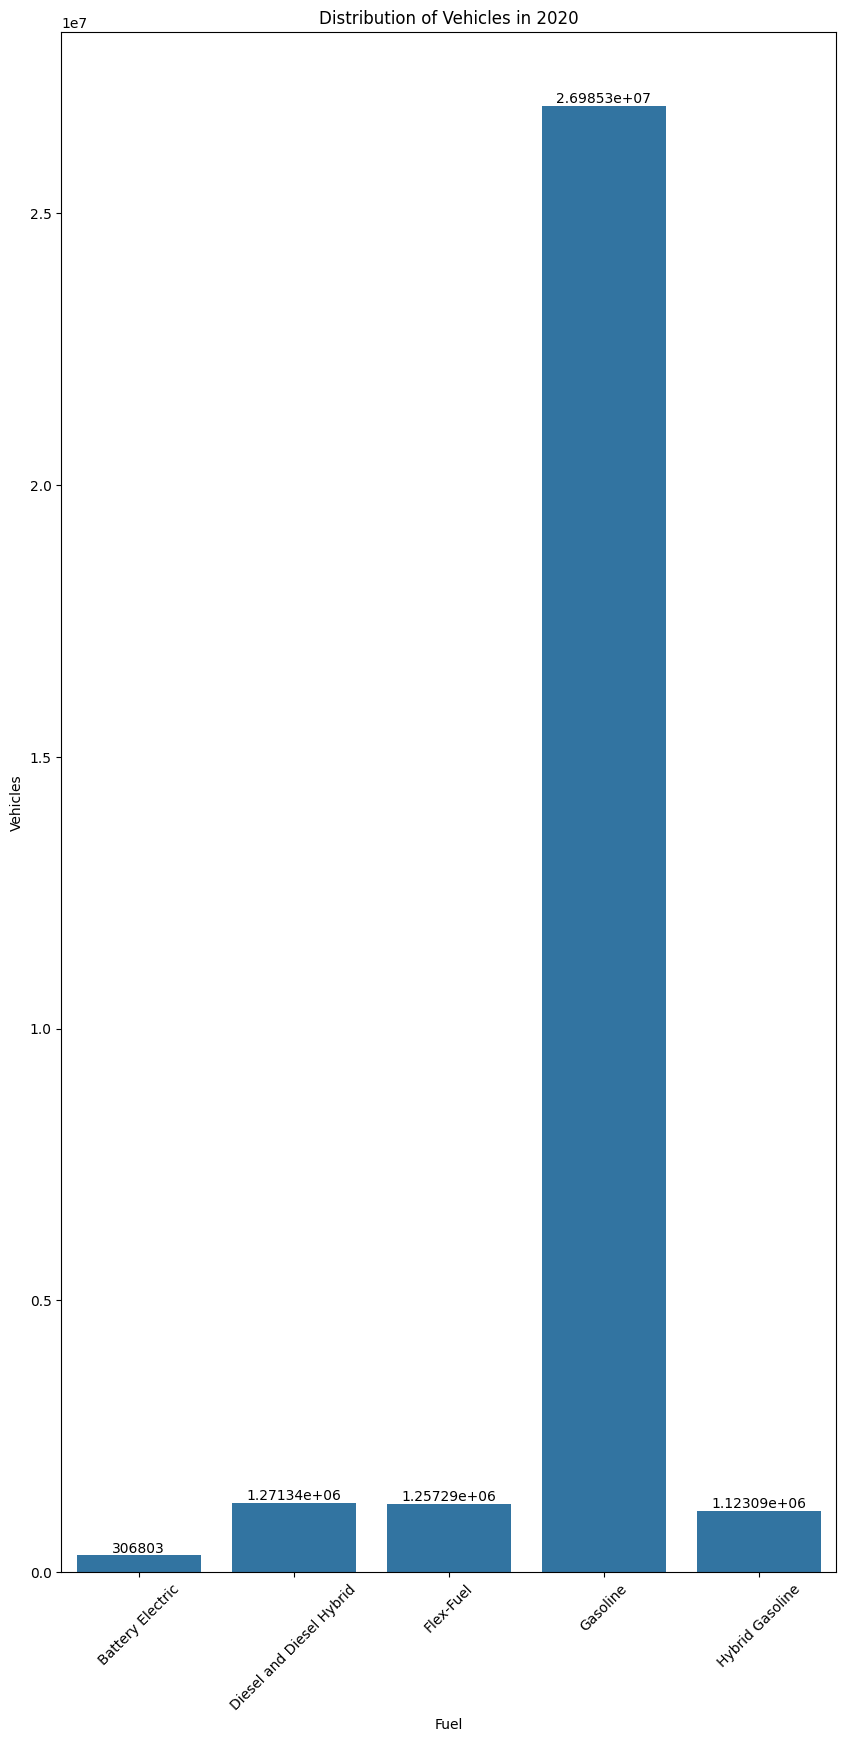

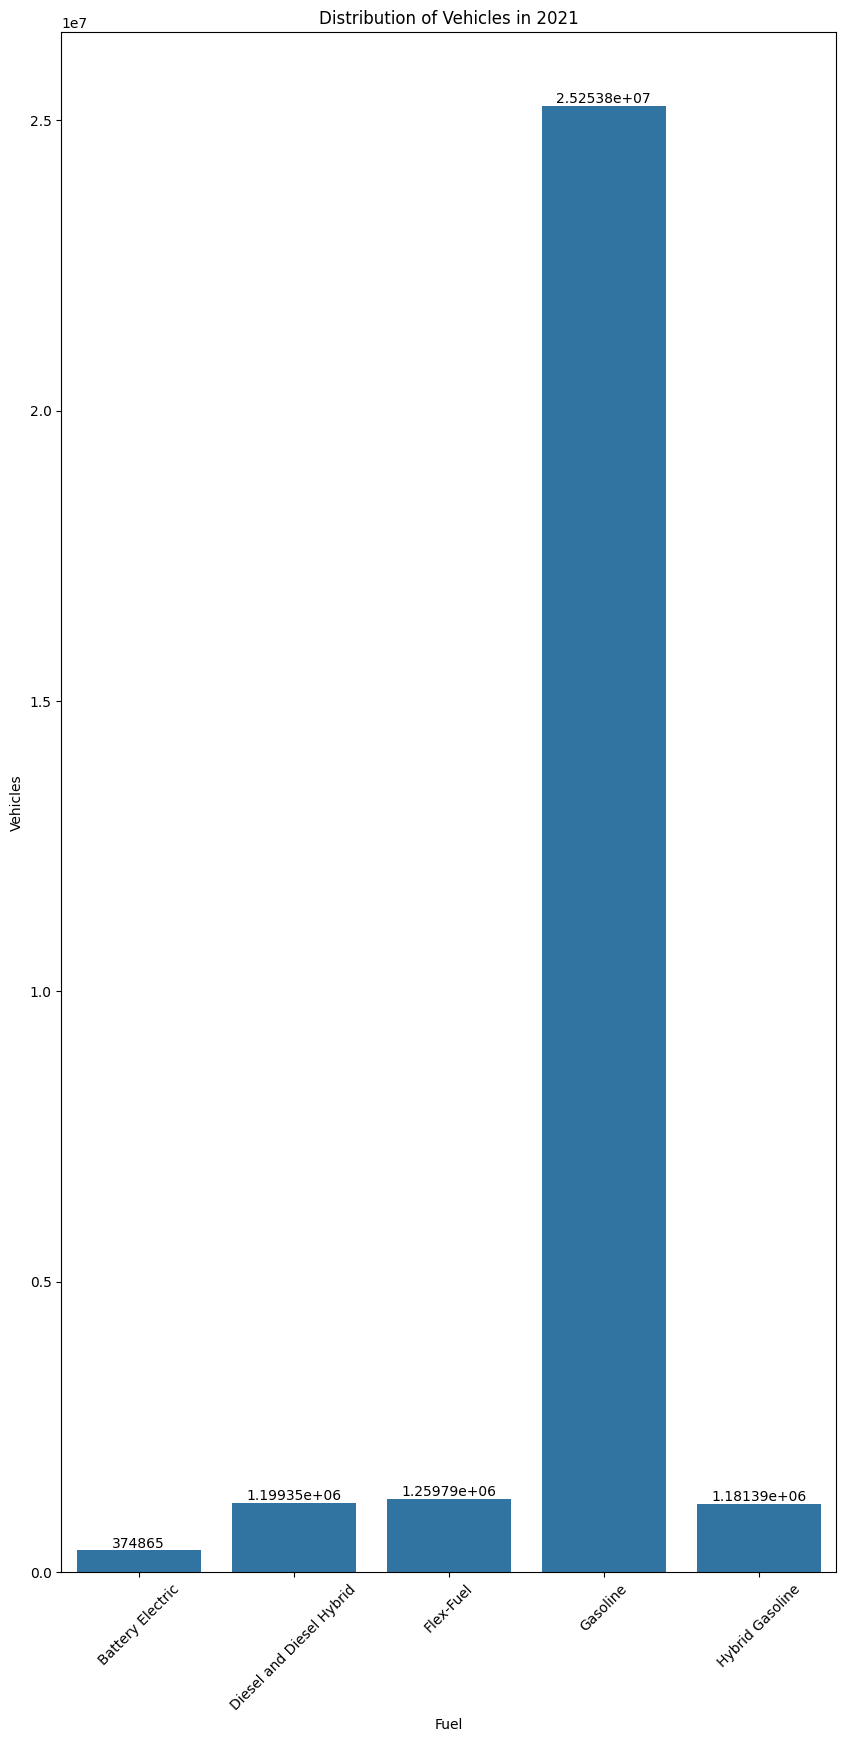

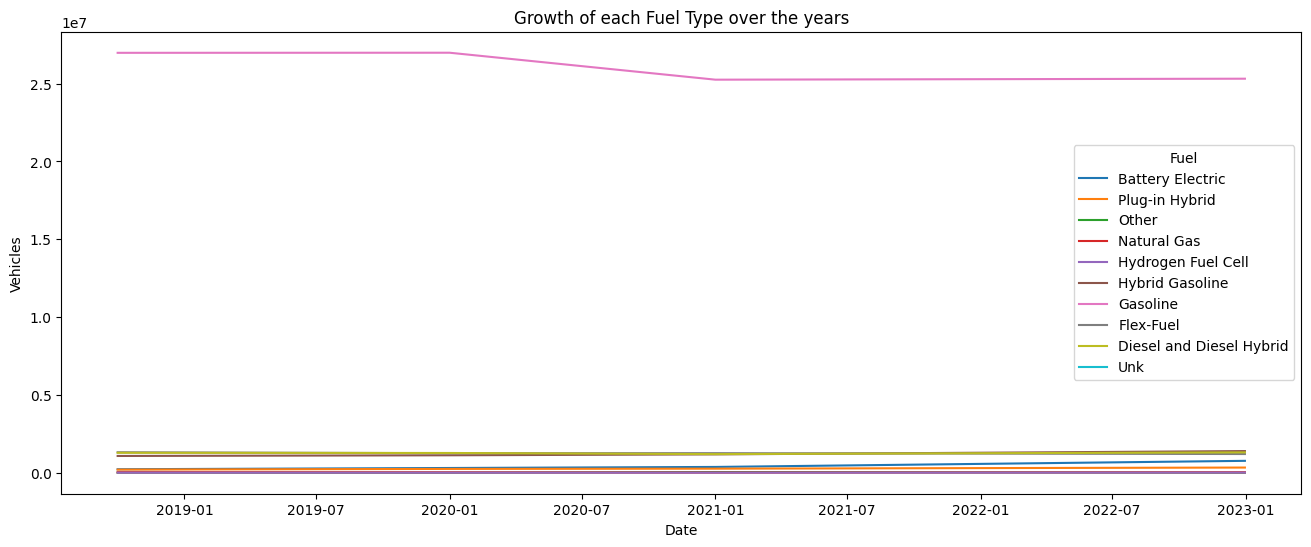

In [6]:
### Current Market #######

def show_current_market(df, current):

    plt.figure(figsize = (10,20))
    plt.title(current)
    plt.xticks(rotation=45)
    groups = df.groupby("Fuel").Vehicles.sum().loc["Battery Electric":"Hybrid Gasoline"]
    
    
    g = sns.barplot(data = groups)

    g.bar_label(g.containers[0], label_type='edge')
    return g

show_current_market(jan2020, "Distribution of Vehicles in 2020")

show_current_market(jan2021, "Distribution of Vehicles in 2021")


total_market = total = pd.concat([jan2018, jan2020, jan2021, jan2022])

total_market = total_market.groupby(by = ["Date", "Fuel"]).Vehicles.sum().reset_index()
total_market.Date = pd.to_datetime(total_market.Date)
total_market = total_market.set_index("Date").sort_index()
plt.figure(figsize = (16,6))
plt.title("Growth of each Fuel Type over the years")
sns.lineplot(x = total_market.index, y = total_market.Vehicles, hue = total_market.Fuel)


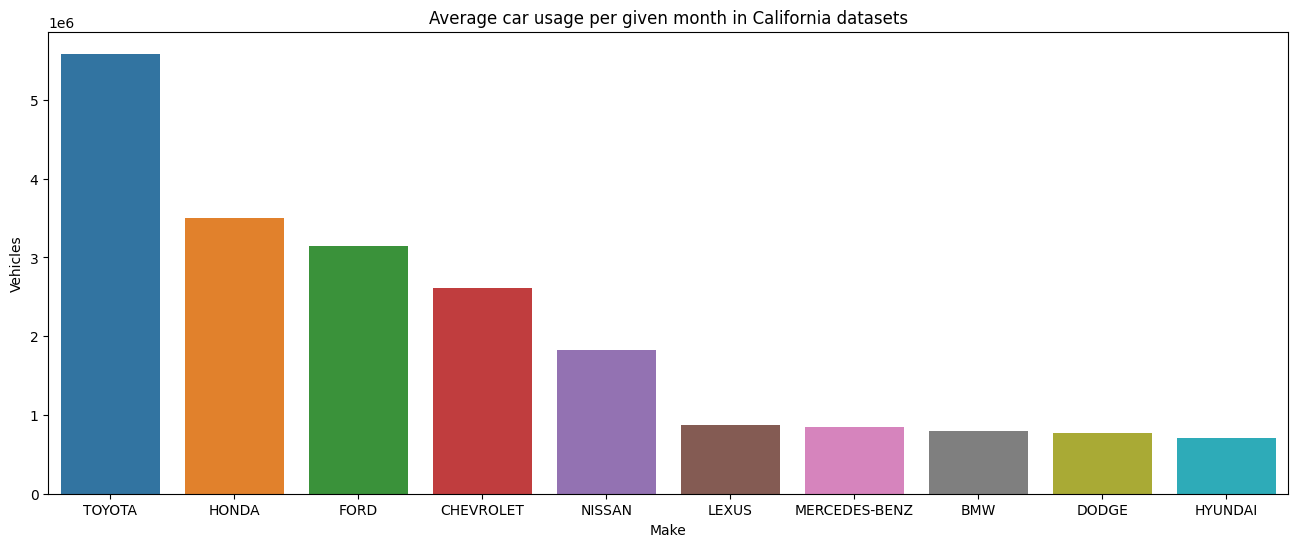

In [7]:
######## Top companies (makes) #################

total = pd.concat([jan2018, jan2020, jan2021, jan2022])

top_makes = total.groupby(by = ["Make", "Date"]).Vehicles.sum()
top_makes = top_makes.reset_index().groupby("Make").Vehicles.mean()
top_makes = top_makes.sort_values(ascending = False).reset_index()


top_makes = top_makes.loc[top_makes.Make != "OTHER/UNK"].iloc[:10]

top_makes

plt.figure(figsize = (16,6))
plt.title("Average car usage per given month in California datasets")
sns.barplot(x = top_makes["Make"], y = top_makes["Vehicles"], hue = top_makes.Make)
plt.savefig("top_companies.png")

# Look at Heavy and light duty relationships


<b> Look like Toyota, Honda, and Ford are the top companies </b>

<b> Lets look at a electric car company. Example would be tesla! </b>

         Make  Average Per January Month over Years
0       TESLA                             256935.75
1   OTHER/UNK                             115202.50
2   CHEVROLET                              19208.00
3      NISSAN                              10014.25
4  VOLKSWAGEN                               4042.00


,Make,Vehicles
4,CHEVROLET,2606450.50
5,NISSAN,1822856.75


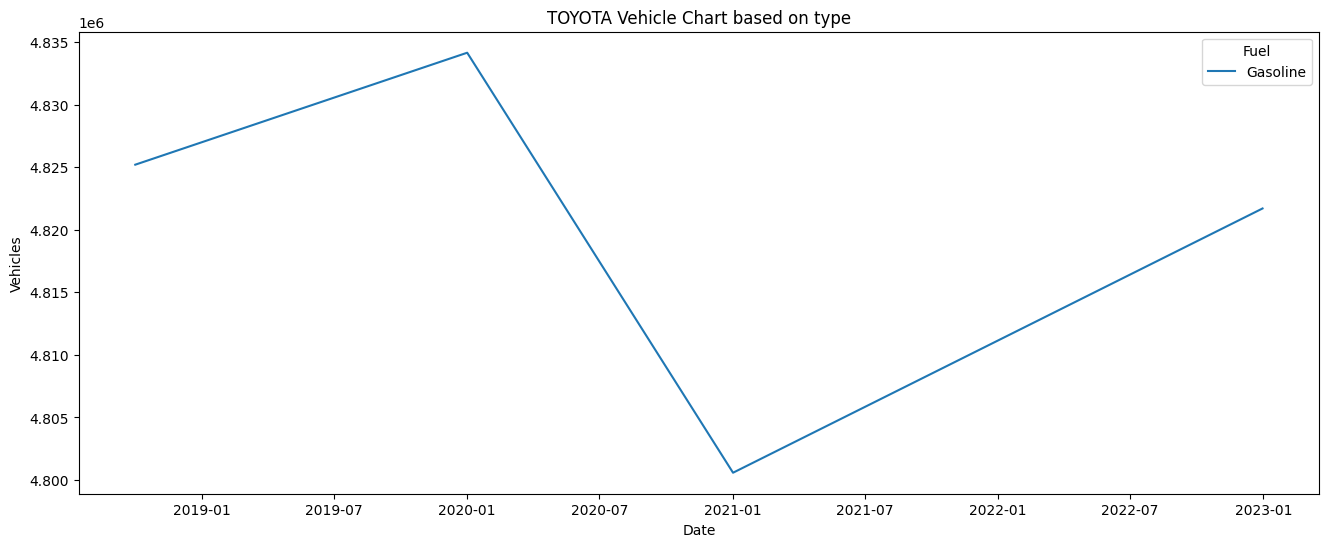

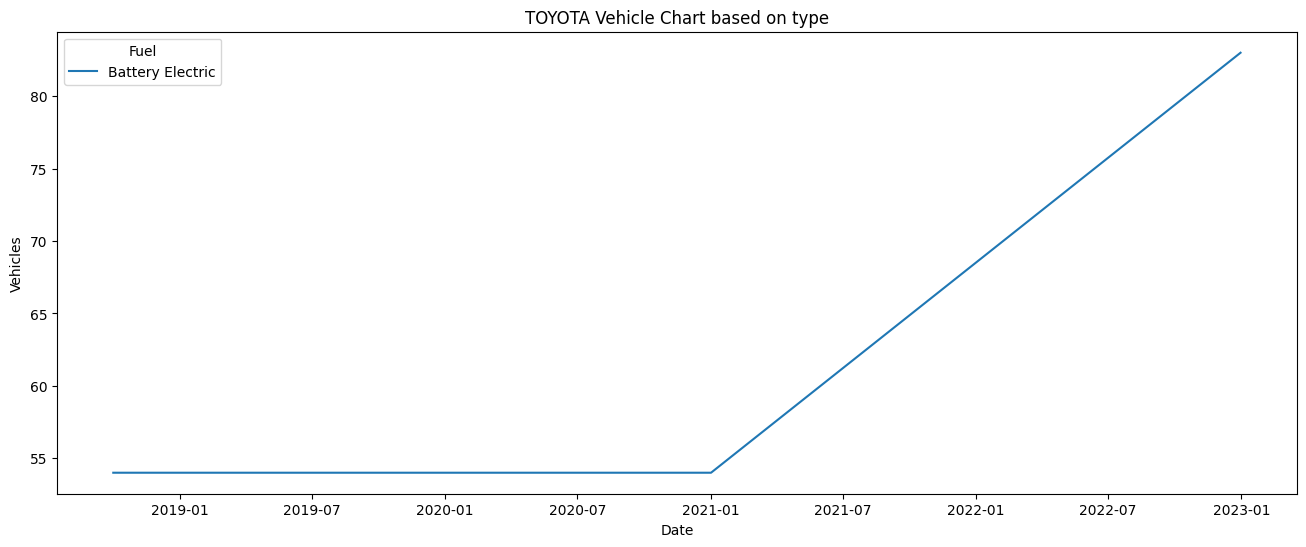

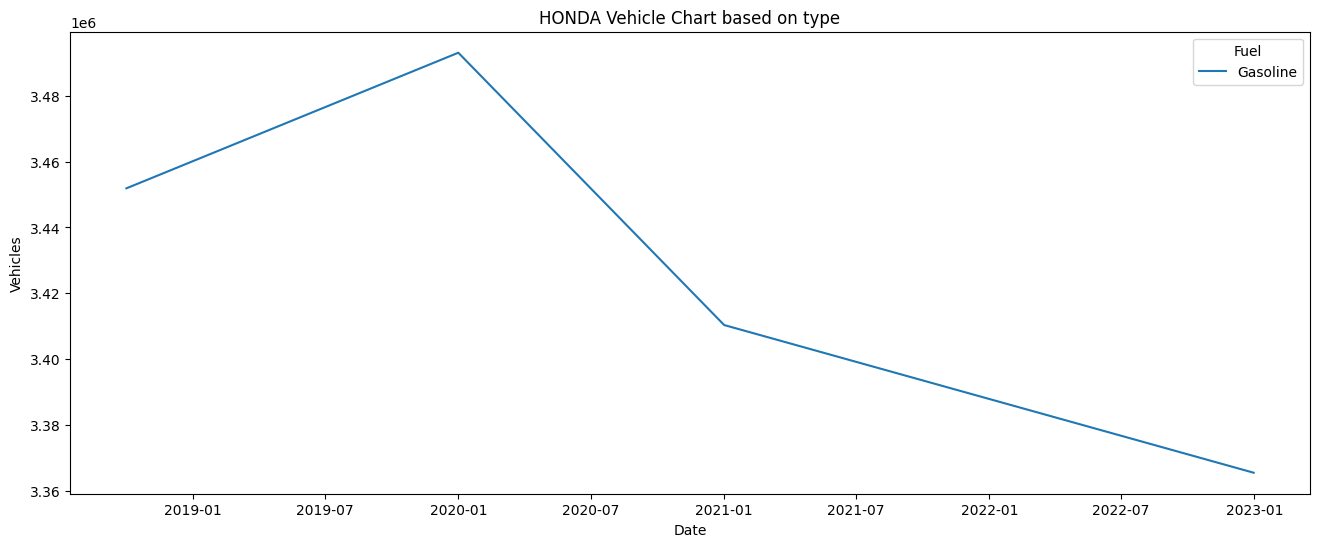

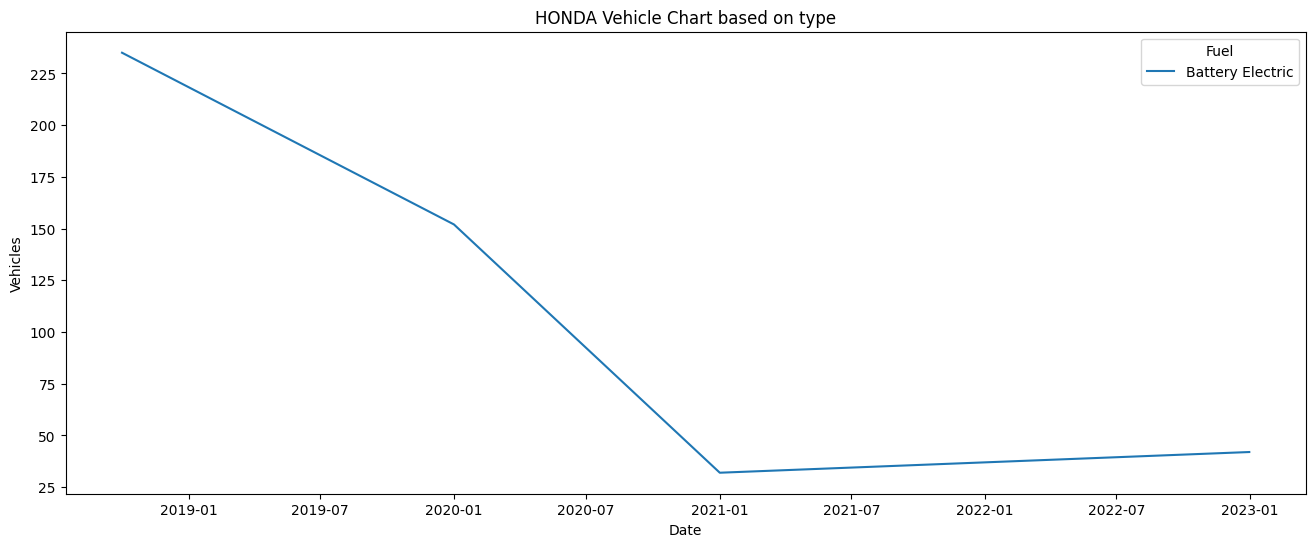

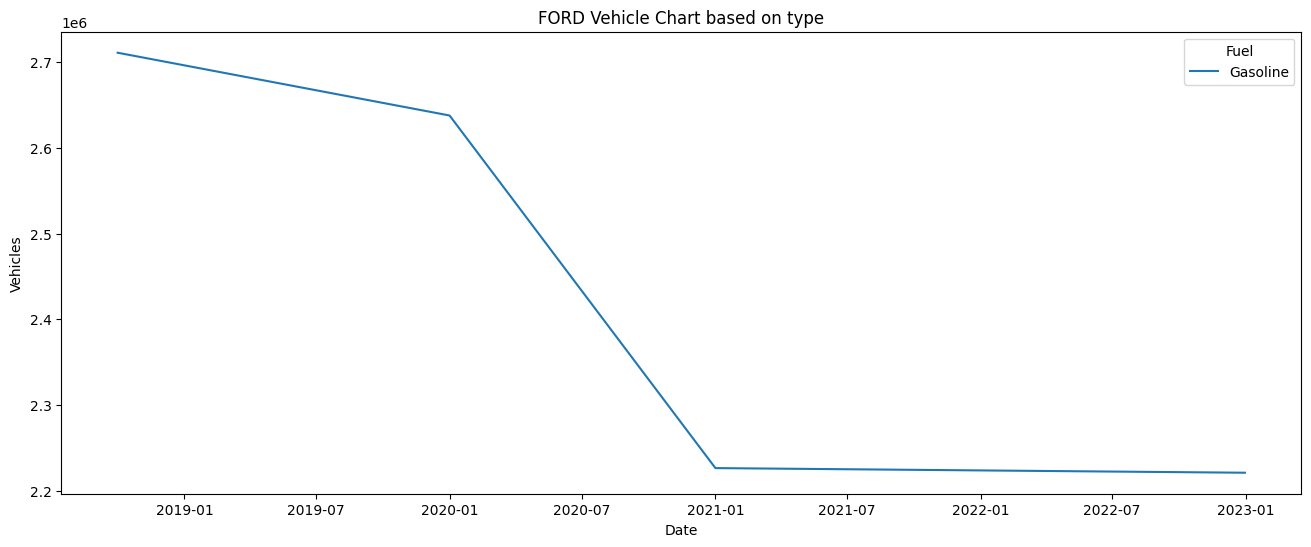

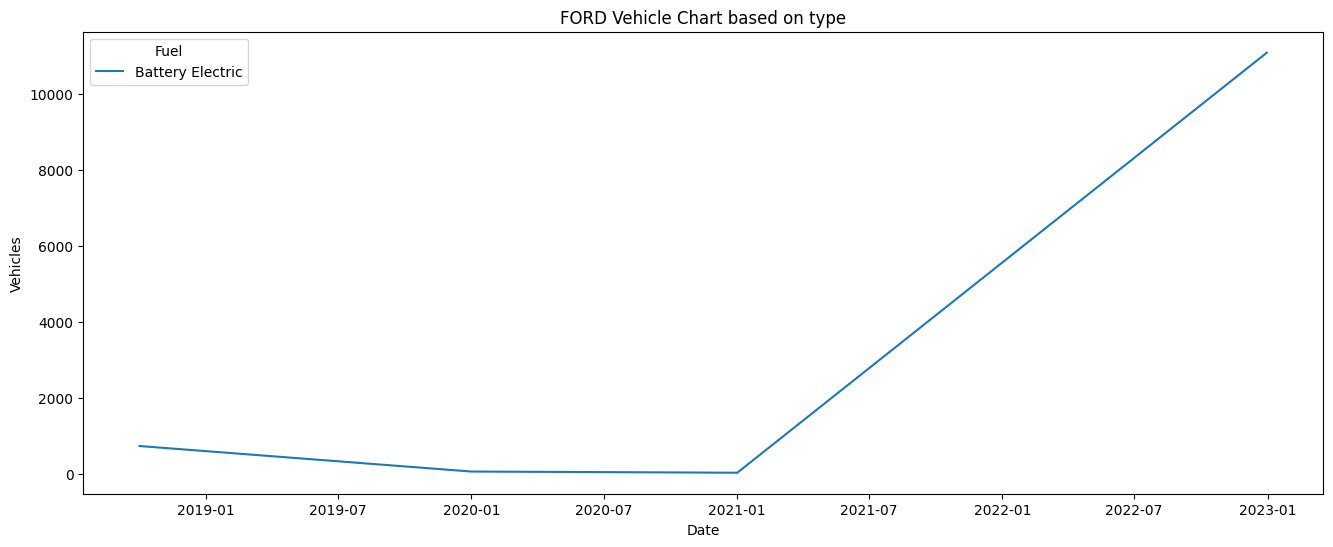

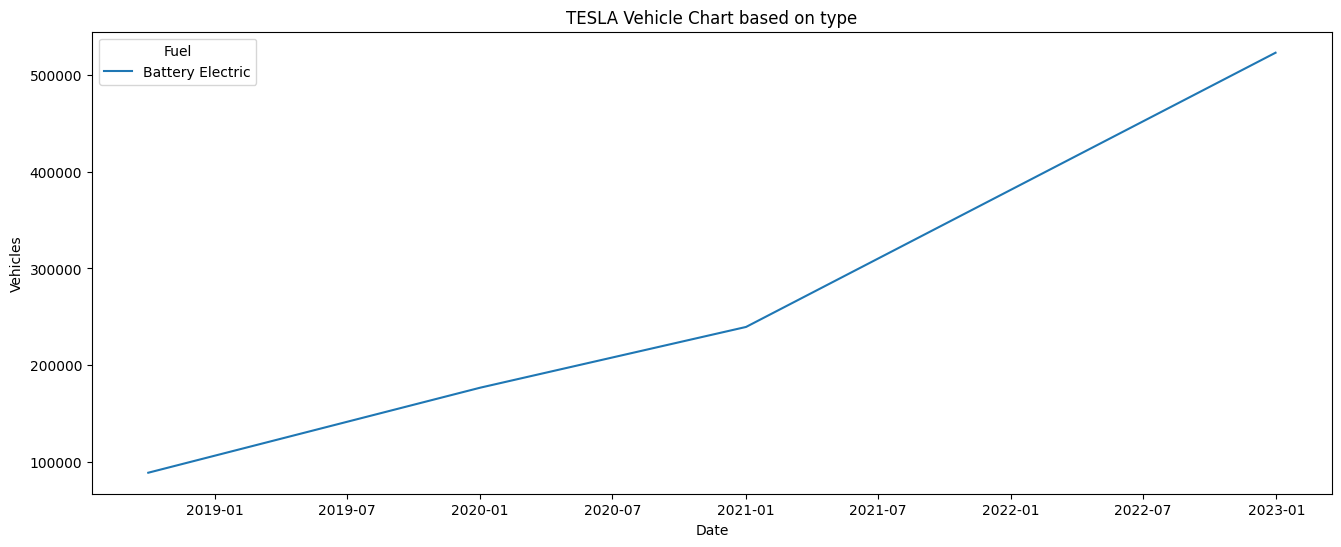

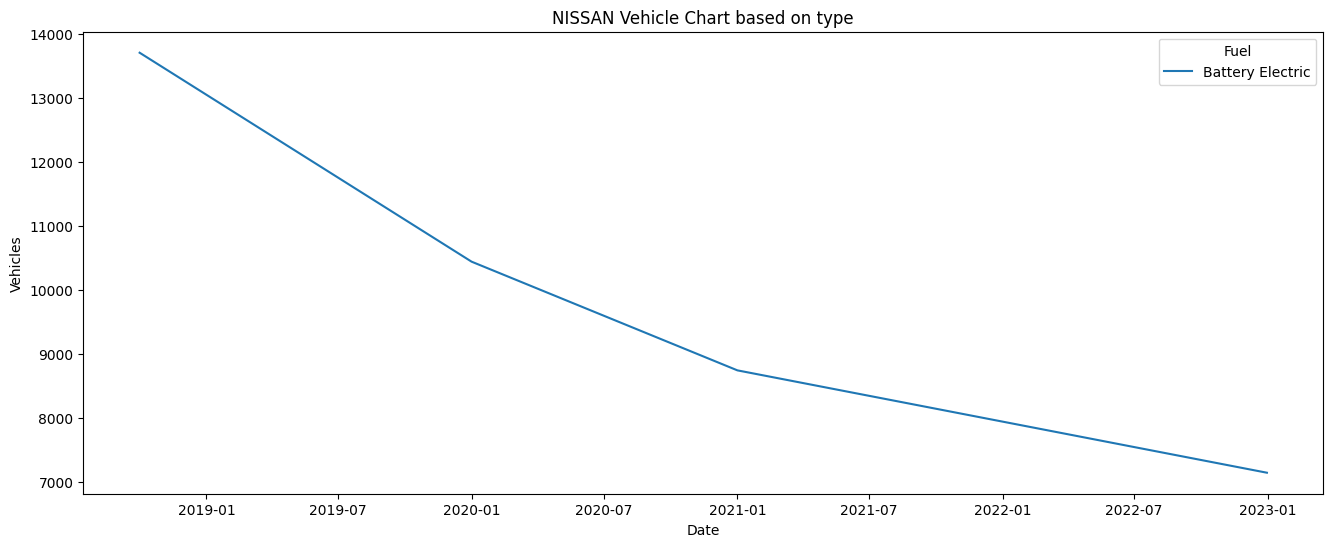

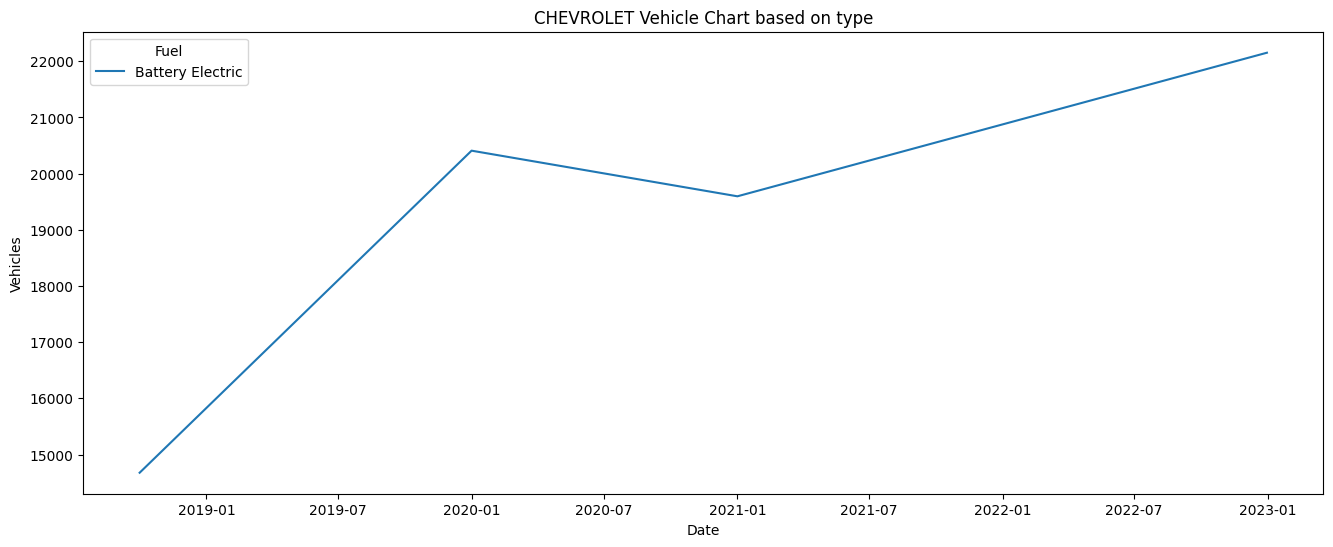

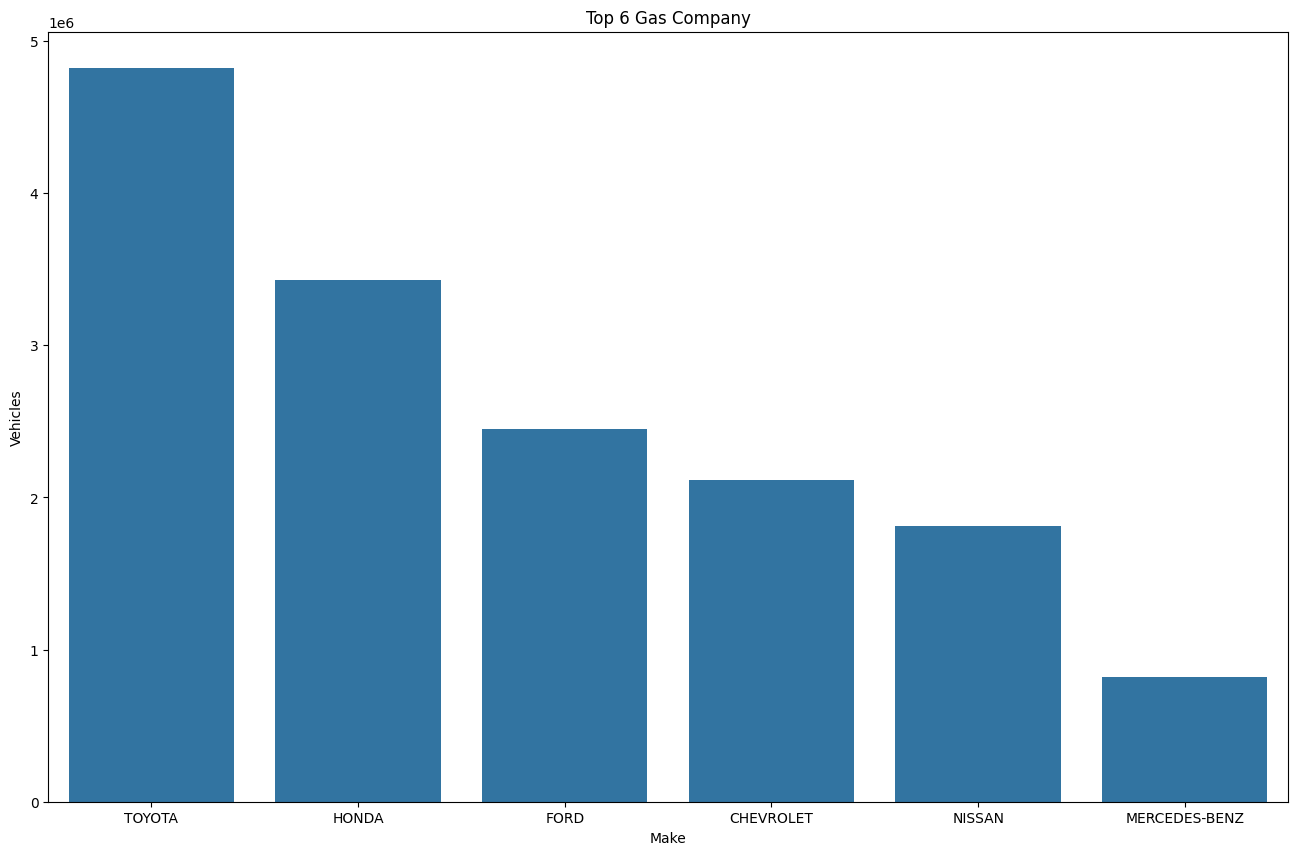

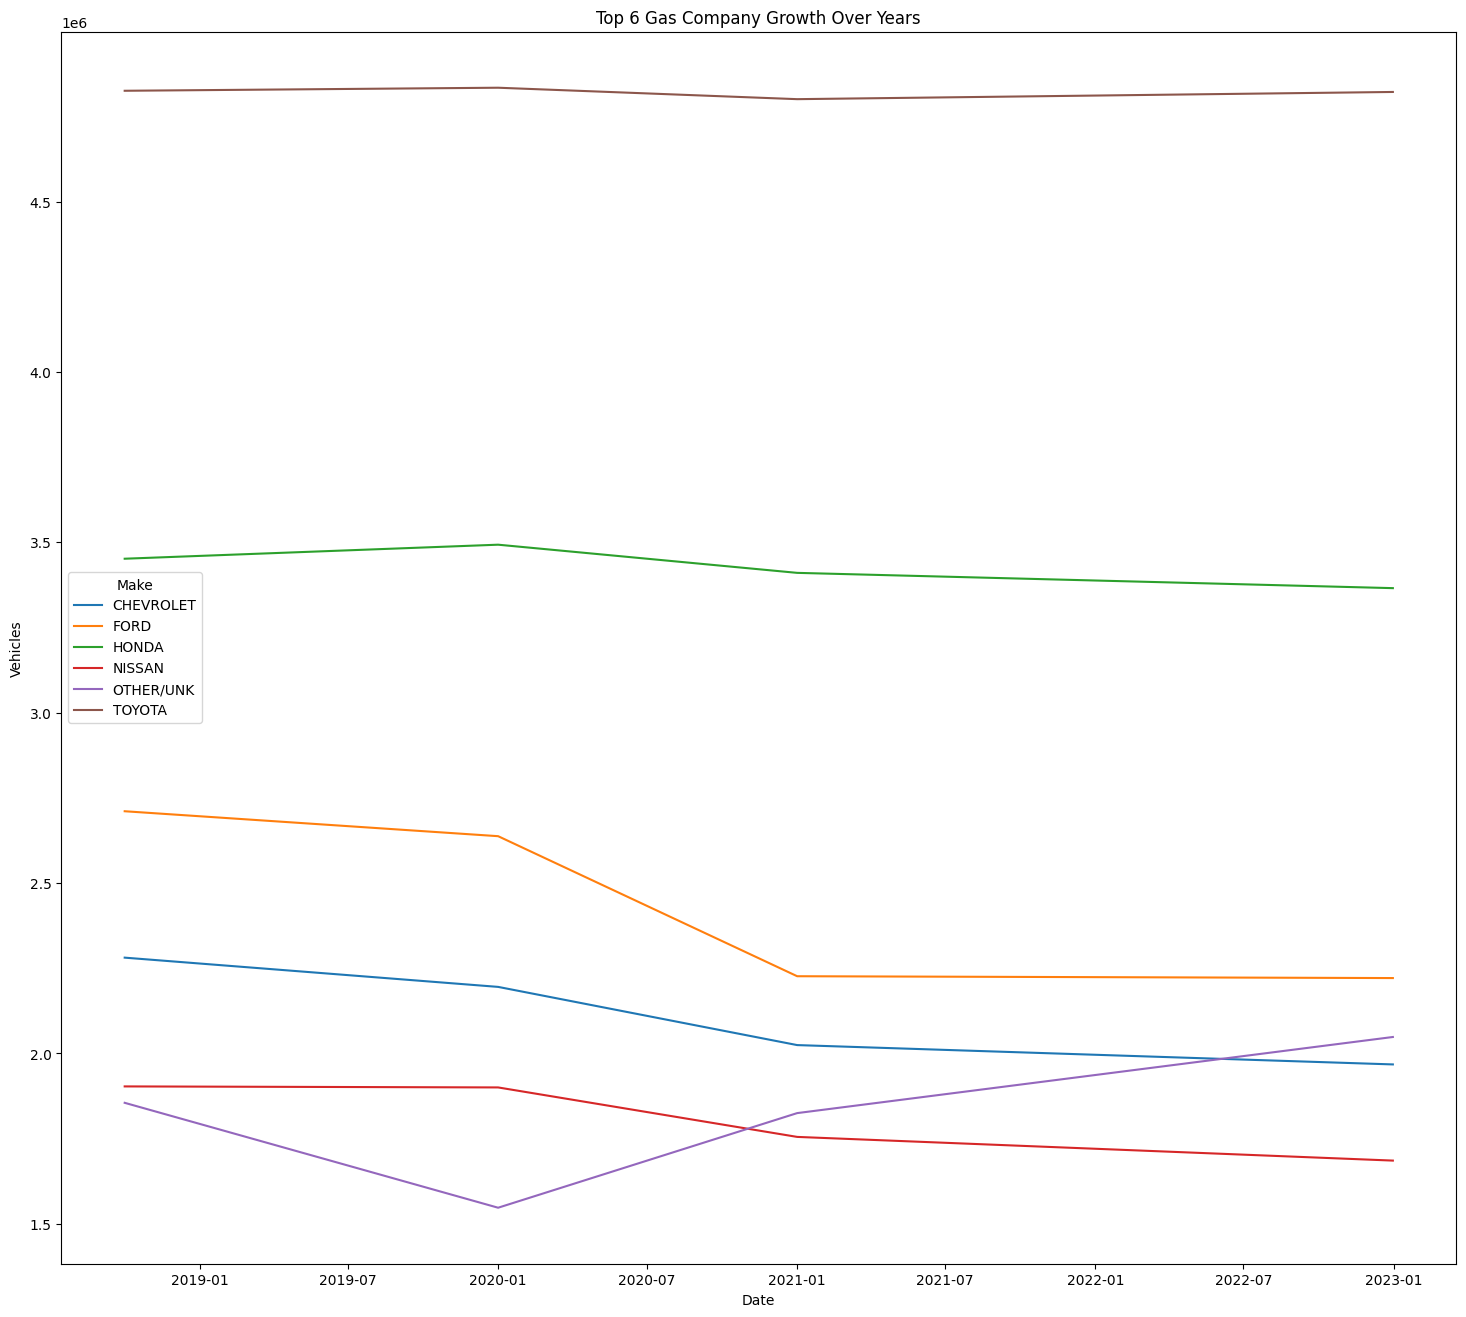

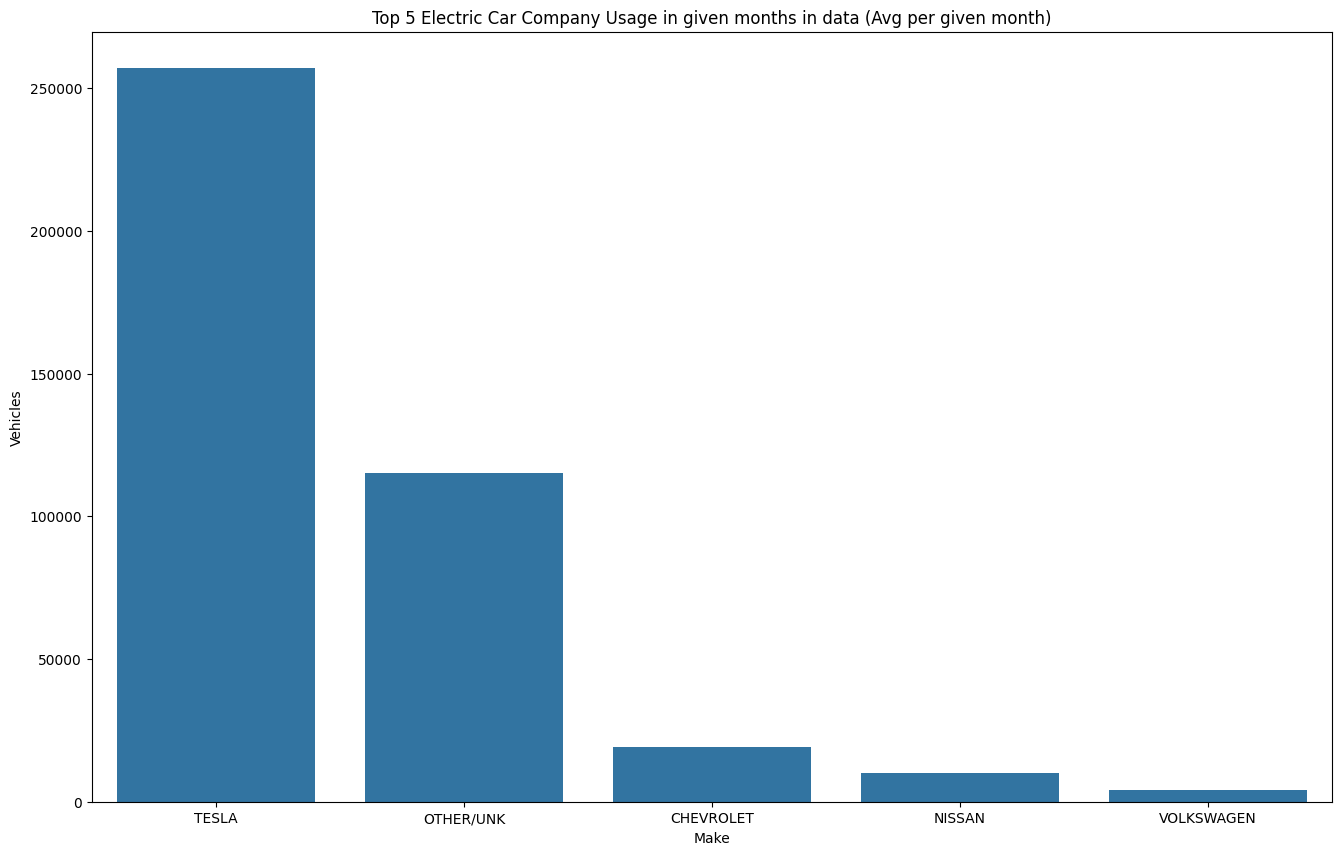

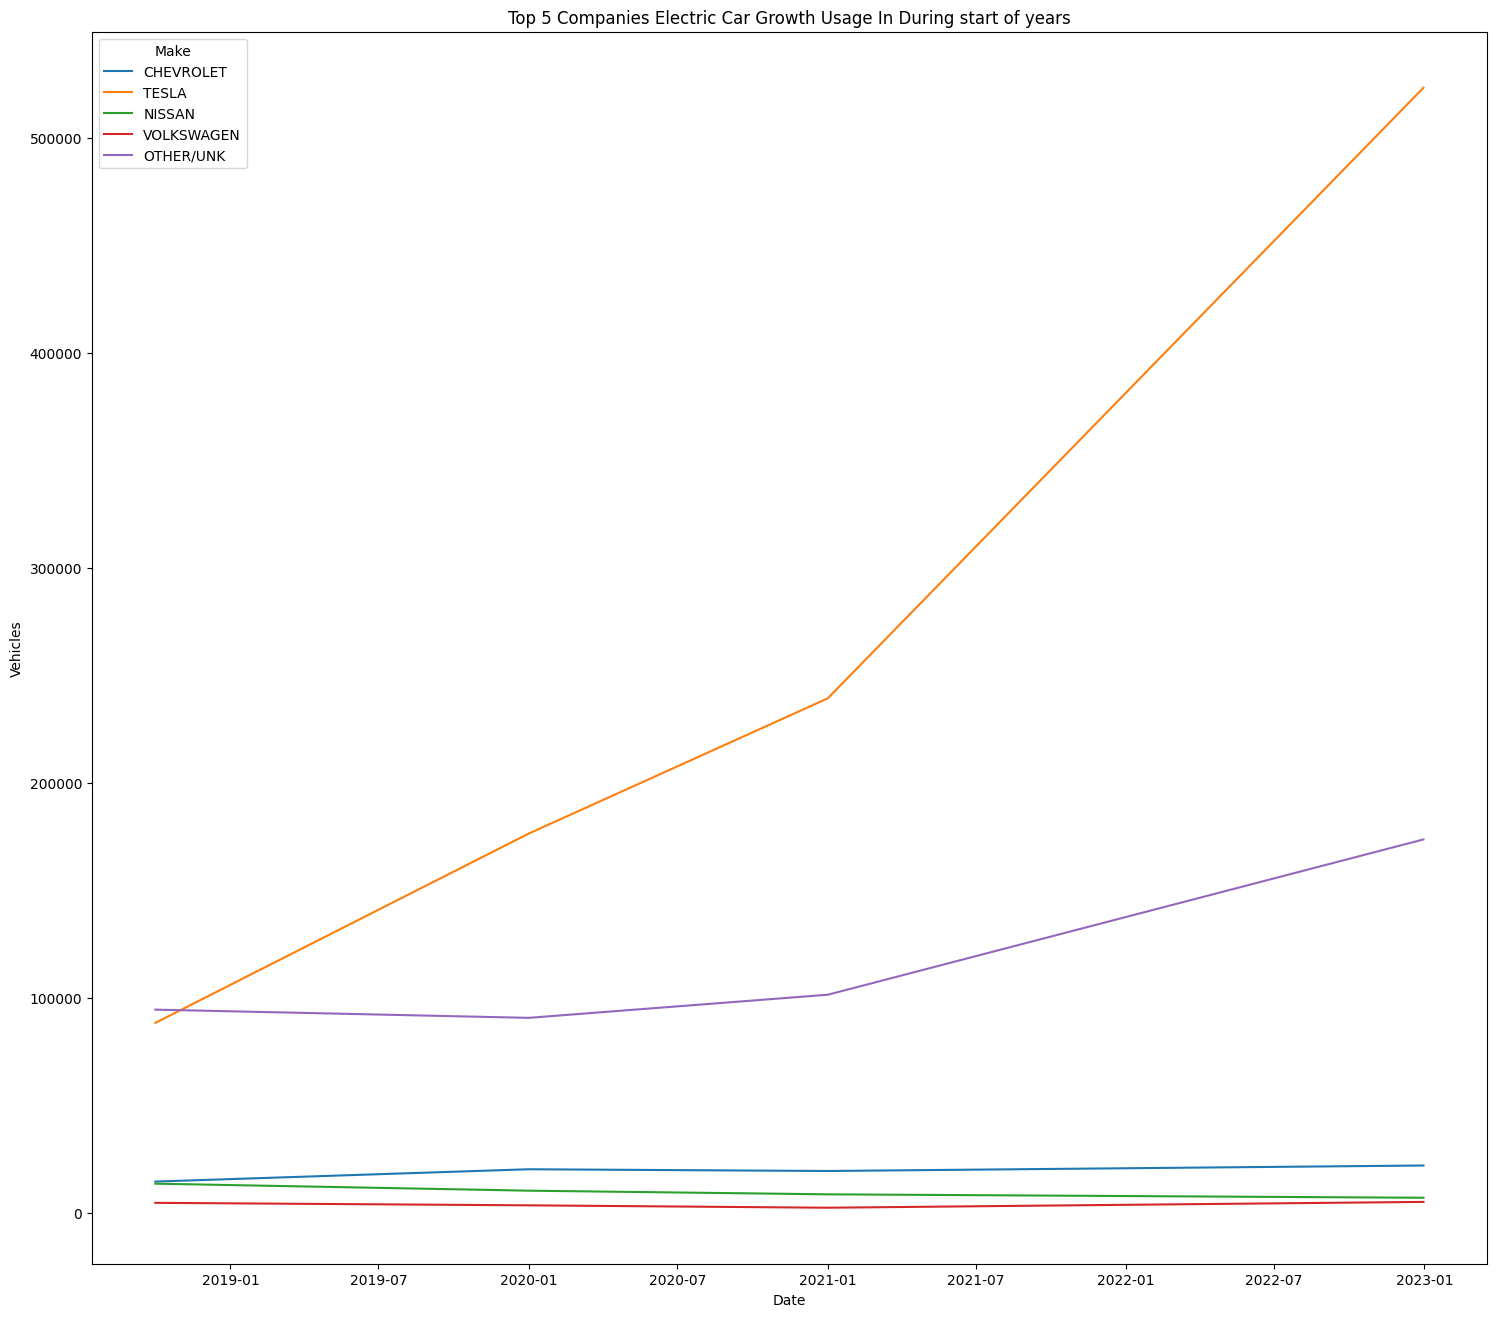

In [27]:



def get_company_data(company, fuel_types, save=False):
    
    based_company = total.groupby(by = ["Make", "Date", "Fuel"]).Vehicles.sum()
    cars = based_company.loc[company].reset_index()
    cars.Date = pd.to_datetime(cars.Date)
    cars_df = cars.set_index("Date").sort_index()
    cars_df = cars_df.loc[cars_df.Fuel.isin(fuel_types)]
    
    plt.figure(figsize=(16,6))
    plt.title(company + " Vehicle Chart based on type")
    sns.lineplot(x = cars_df.index, y = cars_df.Vehicles, hue = cars_df.Fuel)

    if save:
        plt.savefig(company + str(fuel_types) + "graph.png")

get_company_data("TOYOTA", ["Gasoline"])
get_company_data("TOYOTA", ["Battery Electric"])
get_company_data("HONDA", ["Gasoline"])
get_company_data("HONDA", ["Battery Electric"])
get_company_data("FORD", ["Gasoline"])
get_company_data("FORD", ["Battery Electric"])
get_company_data("TESLA", ["Battery Electric"])
get_company_data("NISSAN", ["Battery Electric"], True)
get_company_data("CHEVROLET", ["Battery Electric"], True)


### Chart that shows Battery electric for all companies ###


# Battery Electric vs Date, hue = companies
# Now show us a graph of different companies' growth.
# First show top 5 companies's average battery vehicle usage per january

grouped_company_data = total.groupby(by = ["Fuel", "Make", "Date"]).Vehicles.sum()

grouped_electric_data = grouped_company_data.loc["Battery Electric"]
grouped_electric_data = grouped_electric_data.reset_index()
top_5_electric = grouped_electric_data.groupby("Make").Vehicles.mean().sort_values(ascending = False).iloc[:5]
print(top_5_electric.reset_index().rename(columns = {"Vehicles": "Average Per January Month over Years"}))

# Getting top 5 gasoline data
grouped_gasoline_data = grouped_company_data.loc["Gasoline"]
#Make, Date, Vehicles
gasoline_df = grouped_gasoline_data.reset_index()
top_5_gas = gasoline_df.loc[gasoline_df.Make != "OTHER/UNK"].groupby("Make").Vehicles.mean().sort_values(ascending=False).iloc[:6]

plt.figure(figsize = (16,10))
plt.title("Top 6 Gas Company")
sns.barplot(data = top_5_gas)
plt.savefig("Top 6 Gas Company.png")
gasoline_df.loc[:, "Date"] = pd.to_datetime(gasoline_df.Date)
gasoline_df = gasoline_df.loc[gasoline_df.Make.isin(["TOYOTA", "HONDA", "FORD", "CHEVROLET", "OTHER/UNK", "NISSAN"])]
plt.figure(figsize = (18,16))
plt.title("Top 6 Gas Company Growth Over Years")
sns.lineplot(x = gasoline_df["Date"], y = gasoline_df["Vehicles"], hue = gasoline_df["Make"])

plt.figure(figsize = (16,10))
plt.title("Top 5 Electric Car Company Usage in given months in data (Avg per given month)")
sns.barplot(data=top_5_electric)
## Graph Growth of these 5 companies electric over the years

## Make, Fuel type, Date, Vehicles for that Date
top_5_data = grouped_electric_data.loc[grouped_electric_data.Make.isin(["TESLA", "OTHER/UNK", "CHEVROLET", "NISSAN", "VOLKSWAGEN"])]

top_5_data.loc[:, "Date"]  = pd.to_datetime(top_5_data["Date"])
top_5_data = top_5_data.sort_values(by = ["Date"])
plt.figure(figsize = (18,16))
plt.title("Top 5 Companies Electric Car Growth Usage In During start of years")
sns.lineplot(x = top_5_data.Date, y = top_5_data.Vehicles, hue = top_5_data.Make)
plt.savefig("Top 5 Bat Ele.png")

top_5_data.head()
top_makes.loc[top_makes.Make.isin(["TESLA", "CHEVROLET", "NISSAN", "VOLKSWAGEN"])]

<p>
    As you can see, the big companies are barely looking at battery electric cars. They dont have much growth for battery electric, and only have growth in gasoline cars. But relatively new company like Tesla are seeing big growth in battery electric cars. This shows that since we aren't as popular as the big companies, we will have a place in the competition to sell electric cars. Being bombarded by big companies in the gasoline market wouldn't give us leverage on the market. Also the top 2 in the Battery Electric Market for different companies is Tesla, and a bunch of unknown/other companies. Other/UNK are a bunch of other unknown companies. This means the the big gasoline giants barely have any influence in the electric car market. You can see that toyota barely has any cars in the electric car market. In fact, big and old companies like Nissan, Ford, and Volkswagen barely have a place in the Electric Car Market according to the graph above.
</p>

<b> As you can see, the growth of Tesla's electric cars more have gone up more than 1000% </b>

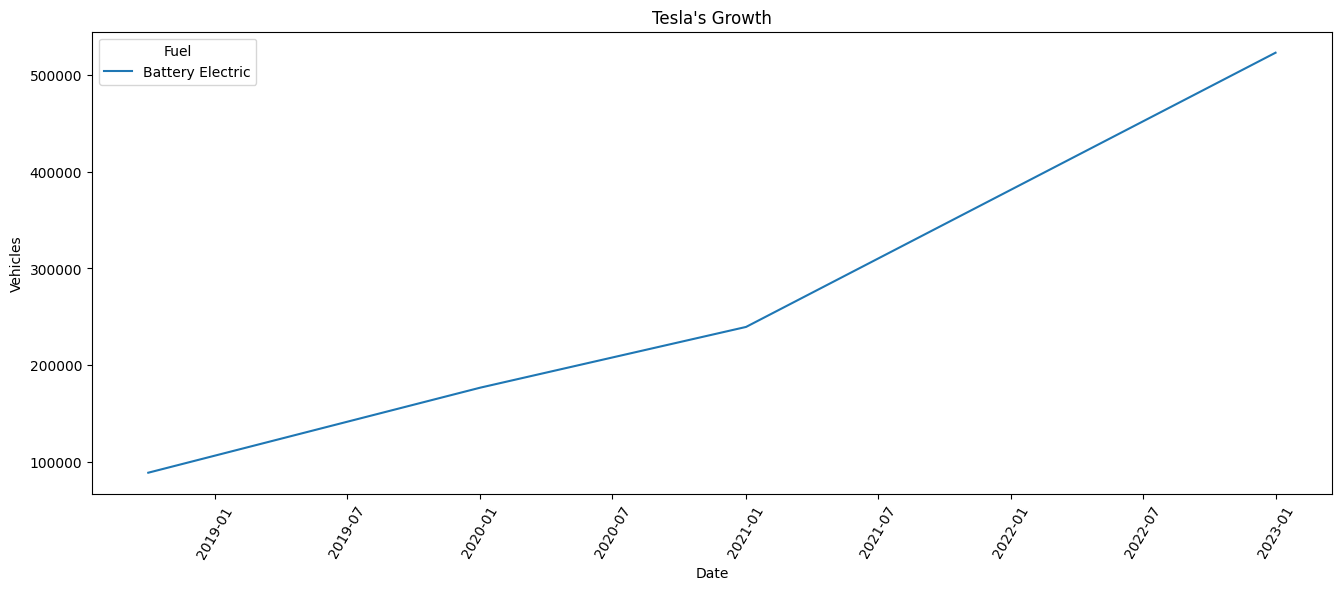

In [12]:
based_company = total.groupby(by = ["Make", "Fuel", "Date"]).Vehicles.sum()
plt.figure(figsize = (16,6))
plt.title("Tesla's Growth")
tesla = based_company.loc["TESLA"].reset_index()
tesla.Date = pd.to_datetime(tesla.Date)
tesla = tesla.set_index("Date").sort_index()
tesla  = tesla.loc[tesla.Fuel.isin(["Battery Electric", "Gasoline"])]
sns.lineplot(x = tesla.index, y = tesla.Vehicles, hue=tesla.Fuel)
plt.xticks(rotation=60)
plt.savefig("tesla growth.png")

<Axes: xlabel='Date', ylabel='Vehicles'>

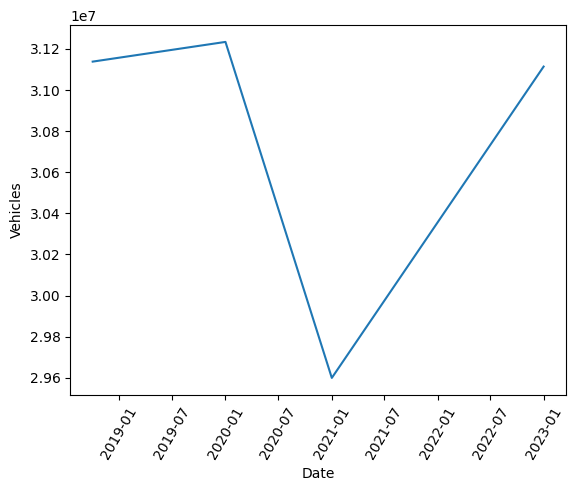

In [10]:



#### Prove Covid Skew #####


skew_data = total.groupby(by = ["Date"]).Vehicles.sum()
skew_data.index = pd.to_datetime(skew_data.index)
skew_data = skew_data.sort_index()
plt.xticks(rotation = 60)
sns.lineplot(data = skew_data)


<h1> Covid Messed Up the Car Market and Car Usage</h1>

<p>
    As you can see, during covid years, from the start of 2019 to the start of 2021, that was when covid was happening, and car usage was very low. Later, after the first month of 2021, car usage suddenly exploded because lockdown wasn't there anymore and people were eager to get out.
</p>

<h1> Should we focus on heavy cars or light cars if we are going electric? </h1>

In [28]:
# Heavy Electric vehicles are inefficient for now because big trucks run better on diesel and gas.

total

,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles
0,10/1/2018,90000,2006,Gasoline,OTHER/UNK,Light,1
1,10/1/2018,90000,2014,Gasoline,OTHER/UNK,Light,1
2,10/1/2018,90000,2016,Gasoline,OTHER/UNK,Light,1
3,10/1/2018,90000,2017,Gasoline,OTHER/UNK,Light,1
4,10/1/2018,90000,<2006,Diesel and Diesel Hybrid,OTHER/UNK,Heavy,55
...,...,...,...,...,...,...,...
767049,12/31/2022,OOS,<2009,Natural Gas,FREIGHTLINER,Heavy,20
767050,12/31/2022,OOS,<2009,Battery Electric,OTHER/UNK,Light,2
767051,12/31/2022,OOS,<2009,Other,OTHER/UNK,Heavy,2
767052,12/31/2022,OOS,<2009,Other,OTHER/UNK,Light,8


In [35]:
#Should we focus on heavy cars or electric cars.
total.loc[:, "Date"] = pd.to_datetime(total["Date"])


[Text(0, 0, '225240'),
 Text(0, 0, '305272'),
 Text(0, 0, '374392'),
 Text(0, 0, '763065')]

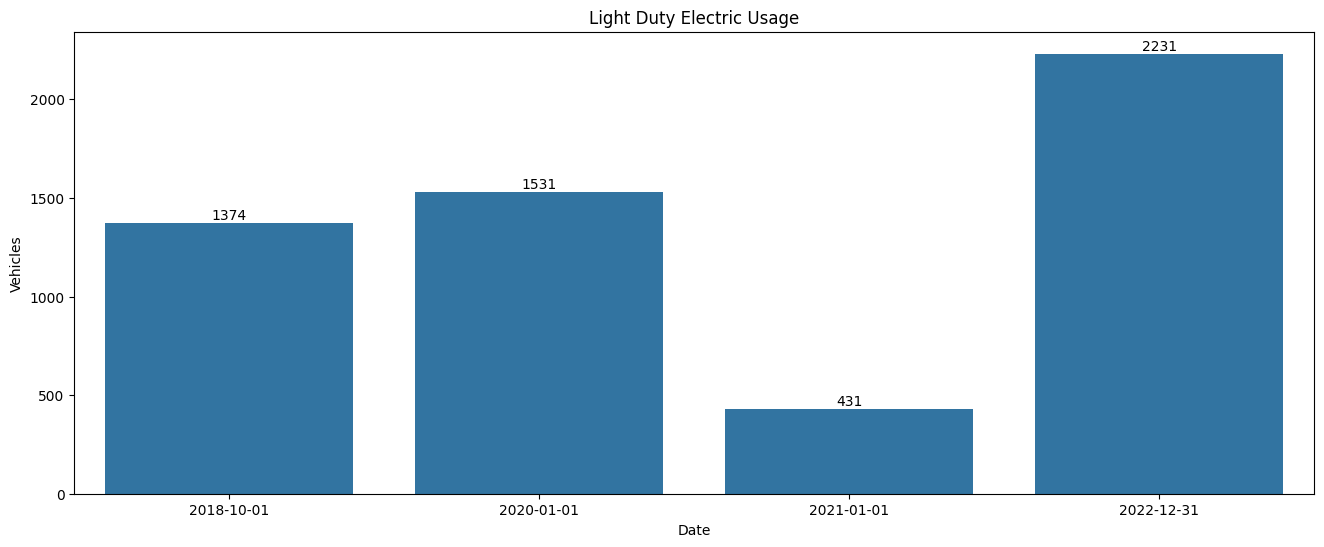

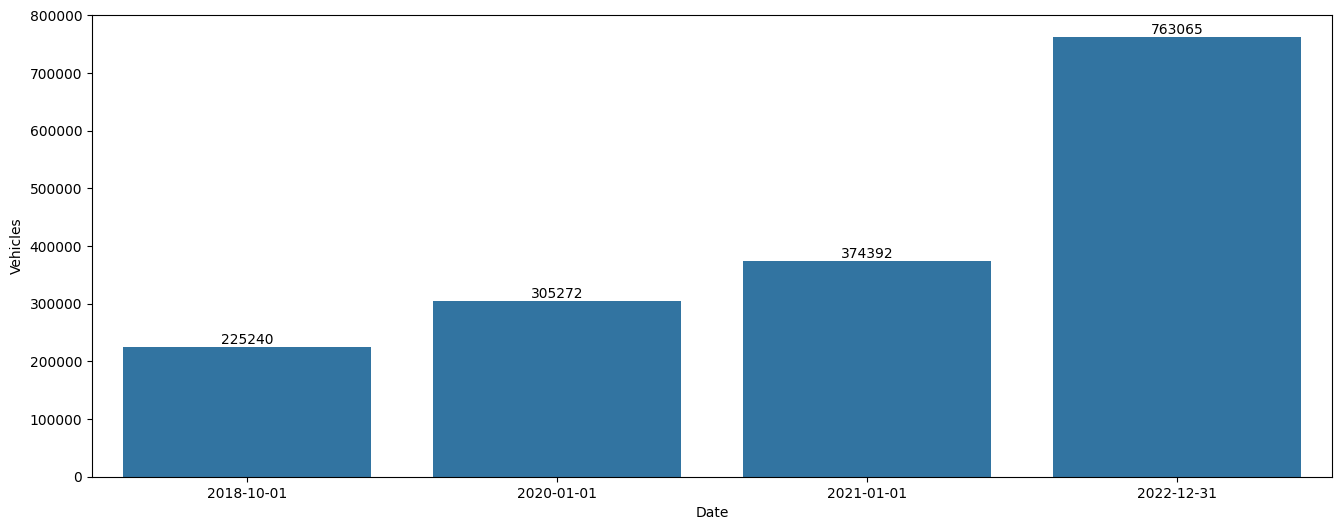

In [45]:
grouped_duty = total.groupby(by = ["Fuel", "Duty", "Date"]).Vehicles.sum().sort_index()
grouped_duty = grouped_duty["Battery Electric"]

plt.figure(figsize = (16,6))
plt.title("Heavy Duty Electric Usage")
g = sns.barplot(data = grouped_duty.loc["Heavy"])
g.bar_label(g.containers[0], label_type='edge')
g

plt.title("Light Duty Electric Usage")
plt.figure(figsize = (16,6))
sns.lineplot(data = grouped_duty.loc["Light"])
a = sns.barplot(data = grouped_duty.loc["Light"])
a.bar_label(a.containers[0], label_type='edge')

